In [1]:
pip install tensorflow


In [8]:
!pip install keras

Epoch 1/3
938/938 ━━━━━━━━━━━━━━━━━━━━ 54s 55ms/step - accuracy: 0.8764 - loss: 0.4032 - val_accuracy: 0.9772 - val_loss: 0.0683
Epoch 2/3
938/938 ━━━━━━━━━━━━━━━━━━━━ 83s 57ms/step - accuracy: 0.9830 - loss: 0.0591 - val_accuracy: 0.9875 - val_loss: 0.0385
Epoch 3/3
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 57ms/step - accuracy: 0.9874 - loss: 0.0406 - val_accuracy: 0.9881 - val_loss: 0.0363
313/313 - 2s - 8ms/step - accuracy: 0.9881 - loss: 0.0363

Test accuracy: 0.988099992275238


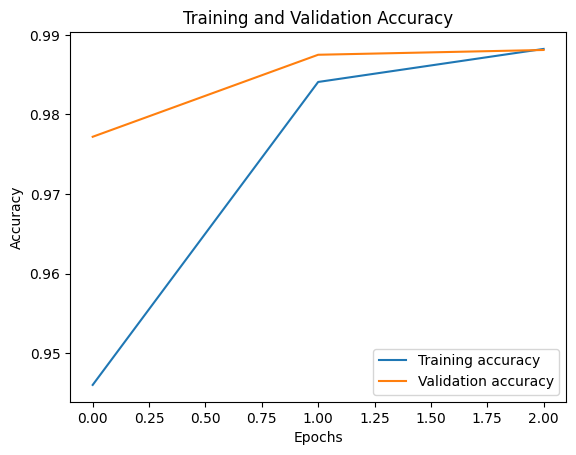

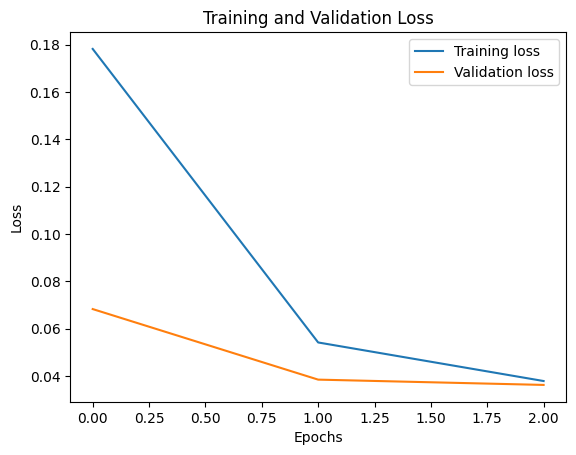

In [21]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0

x_train = np.expand_dims(x_train, axis=-1)  # (28, 28) -> (28, 28, 1)
x_test = np.expand_dims(x_test, axis=-1)  # (28, 28) -> (28, 28, 1)

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),  # First convolutional layer
    layers.MaxPooling2D((2, 2)),  # Max pooling layer
    layers.Conv2D(64, (3, 3), activation='relu'),  # Second convolutional layer
    layers.MaxPooling2D((2, 2)),  # Max pooling layer
    layers.Flatten(),  # Flatten layer to connect to fully connected layers
    layers.Dense(64, activation='relu'),  # Fully connected layer
    layers.Dense(10, activation='softmax')  # Output layer (10 classes for MNIST)
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=3, batch_size=64, validation_data=(x_test, y_test))


test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc}')

plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

